In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introdução

A requeima é uma doença que afeta tomateiros e pode causar a perda total do cultivar. Existem plantas resistentes à doença.

O dataset estudado, constituído de 132 observações, relaciona índices extraídos de imagens de plantas tomadas por câmeras especiais (de 5 bandas) adaptadas a drones ao nível de comprometimento de um determinado conjunto de plantas.

O objetivo é construir um modelo que melhore as predições da severidade da doença. Nosso benchmark para o modelo de Regressão Linear: R2 = 0.888; RMSE = 7.539; e MAE = 6.344.

In [2]:
#%% importar o dataset

df = pd.read_csv('dataset_problema2.csv')
df

,id,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,...,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Severidade
0,2,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,30041.91766,...,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860,37.83
1,10,0.789403,1.184062,0.688353,17859.92417,9.527958,0.757559,1.136312,0.706716,26529.38283,...,1.106409,0.653475,17483.16681,7.039555,0.701538,1.052262,0.651048,13607.31327,5.889840,46.07
2,12,0.806006,1.208966,0.698522,18325.86796,10.450621,0.776762,1.165121,0.712256,35348.89095,...,1.136947,0.663469,18970.25945,7.691801,0.721819,1.082688,0.654506,16312.51025,6.385158,38.38
3,20,0.778408,1.167566,0.674224,16130.88569,9.135821,0.755313,1.132947,0.697300,30860.23050,...,1.097415,0.648051,15867.27075,6.888080,0.723709,1.085521,0.659776,15024.84460,6.503054,38.15
4,46,0.777937,1.166863,0.670604,17315.57673,8.797762,0.765304,1.147933,0.699105,30874.50847,...,1.165921,0.678815,23387.23253,8.498031,0.782553,1.173796,0.707183,22071.41814,8.726001,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,99,0.771956,1.157887,0.684271,15544.34528,8.793058,0.756874,1.135286,0.716099,29284.26304,...,1.105095,0.676929,15552.39493,7.002859,0.721953,1.082884,0.678242,13753.59426,6.400156,63.68
128,106,0.684094,1.026101,0.579705,14363.76139,5.485155,0.683368,1.025026,0.621754,21390.94521,...,1.047398,0.612533,15864.07369,5.836134,0.722138,1.083168,0.646372,16276.04763,6.535245,28.48
129,101,0.702853,1.054238,0.596766,14282.54195,6.243612,0.703867,1.055777,0.637277,23944.36106,...,1.059496,0.612366,16146.96220,6.102729,0.715297,1.072908,0.632440,16155.19752,6.366358,37.31
130,105,0.649085,0.973586,0.556922,12279.07652,4.789961,0.651537,0.977283,0.607133,21376.18619,...,1.005140,0.587082,13652.41571,5.173874,0.699264,1.048856,0.619211,14888.57394,5.873620,37.78


In [3]:
X = df.drop(['id', 'Severidade'], axis = 1)
y = df['Severidade']

In [4]:
#%% separar dados de treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
#%% Padronização das variáveis

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #media 0 e desvio padrão 1

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)


X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns

In [6]:
#%% validação cruzada para selecionar o número de variáveis

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

modelo_linear = LinearRegression()

score = cross_val_score(modelo_linear, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.841721582102615


In [7]:
#%% seleção de variáveis

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

max_f = 20

lista_r2 = list()

for i in range(1, max_f+1):
  
  selector = RFE(modelo_linear, n_features_to_select=i, step=1)
  
  selector = selector.fit(X_train_sc, y_train)
  
  mask = selector.support_
  
  features = X_train_sc.columns
  
  sel_features = features[mask]

  X_sel = X_train_sc[sel_features]
  
  modelo_linear = LinearRegression()
  
  score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2') # Verificar correção do código
  
  lista_r2.append(np.abs(np.mean(score)))
  
  print(np.abs(np.mean(score)))

0.06445199150879911
0.093964860292673
0.6727804225017578
0.7266720621278192
0.8223245283784297
0.8233753596091711
0.8202942847769122
0.8160171069369833
0.8642534971611298
0.8655536026350521
0.8592050402769521
0.8626245070270955
0.8617649200612012
0.8568329558901651
0.8551560805815512
0.8539354093354742
0.8498948606433393
0.8484410541093149
0.8438806051052401
0.841721582102615


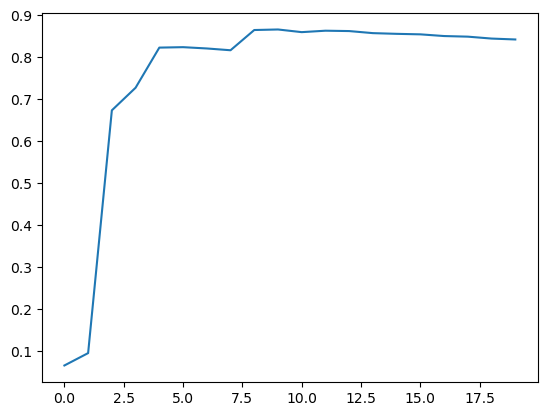

In [8]:
#%% gráfico

plt.plot(lista_r2)

plt.show()

In [9]:
#%% selecionar as features

modelo_linear = LinearRegression()
selector = RFE(modelo_linear, n_features_to_select = 10, step=1)
selector = selector.fit(X_train_sc, y_train)
mask = selector.support_
features = X_train_sc.columns
sel_features = features[mask]

print(sel_features)

Index(['NDVI_d28', 'SAVI_d28', 'NDVI_d01', 'SAVI_d01', 'NDVI_d04', 'SAVI_d04',
       'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'SR_d08'],
      dtype='object')


In [10]:
#%% validação cruzada

modelo_linear = LinearRegression()
X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.8655536026350521


In [11]:
#%% modelo final - Regressão linear multipla

from sklearn.linear_model import LinearRegression

modelo_linear = LinearRegression()

modelo_linear.fit(X_sel, y_train)

coef = modelo_linear.coef_

print(coef)

r2 = modelo_linear.score(X_sel, y_train)

[-3.48320174e+04  3.48360344e+04  6.23485877e+04 -6.23356138e+04
 -1.60865847e+04  1.60746797e+04  2.52778047e+04 -2.52600932e+04
 -5.26898795e+00 -2.82718382e+01]


RMSE 7.539476072294115
MAE 6.3440663489556774
R2 0.887634277869935


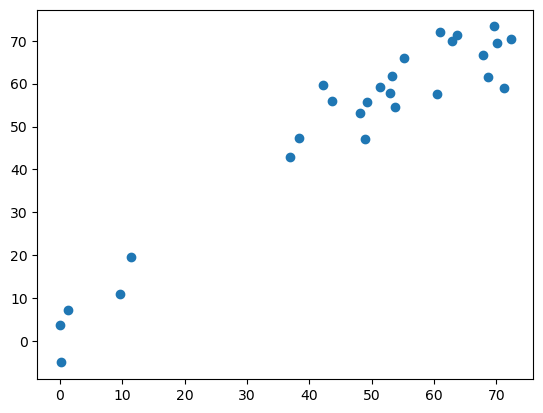

In [12]:
#%% teste final
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


y_pred = modelo_linear.predict(X_test_sc[sel_features])

r2 = modelo_linear.score(X_test_sc[sel_features], y_test)

rmse = (mean_squared_error(y_test, y_pred))**0.5

mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)

plt.scatter(y_test, y_pred)
plt.show()

0.9187543089517886


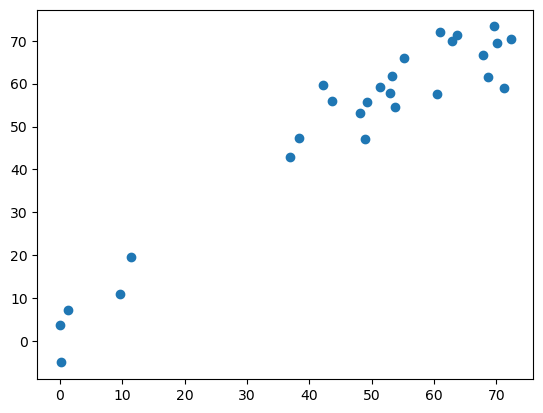

In [13]:
#%% R2 da validação

model_r2 = LinearRegression()
model_r2.fit(np.array(y_test).reshape(-1, 1), y_pred)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

print(model_r2.score(np.array(y_test).reshape(-1, 1), y_pred))

# Método

Para cumprir o objetivo proposto, usamos os regressores DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso() e SVR() e verificamos seus scores R2 obtidos em validação cruzada com os dados de treino. 

Como se sabe, quanto mais próximo o R2 estiver de 1, melhor o modelo se ajusta aos dados.

Os modelos mais promissores foram o RandomForestRegressor(), com R2 aproximado de 0.841 e Ridge(), com R2 próximo de 0.860.

Escolhidos os dois modelos, empregamos a classe do Scikit-Learn para a eliminação recursiva de features (RFE), associando-o ao estimador R2.

Criamos a função plota_r2_n_features() para estabelecer, em gráfico, o número de features necessárias ao bom desempenho dos modelos e, para ambos, estipulamos em 7.

Para o Random Forest foram selecionados pelo RFE as seguintes features: 'GNDVI_d28', 'MCARI1_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08','MCARI1_d08' e 'SR_d08'

Para o Ridge foram selecionadas pelo RFE as features: 'GNDVI_d01', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08'e 'SR_d08'.

Os modelos foram treinados com as features selecionadas, obtendo-se os seguintes resultados finais (dados de teste):

__Ridge():__ 

R2 da validação 0.8537815643146514

RMSE 6.632198845643125

MAE 5.03897671399085

R2 0.9130505998808762

__RandomForestRegressor():__ 

R2 da validação 0.8575500018276516

RMSE 7.581069442416469

MAE 6.627314814814811

R2 0.8863910719108179


In [14]:
# Importações dos demais modelos

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import svm

In [15]:
modelo_linear = LinearRegression()
modelo_dtr = DecisionTreeRegressor()
modelo_rfr = RandomForestRegressor()
modelo_ridge = Ridge()
modelo_lasso = Lasso()
modelo_svr = svm.SVR()

def verifica_score(modelo):
    score = cross_val_score(modelo, X_train_sc, y_train, cv = 10, scoring = 'r2')
    print(f'{modelo}: {np.mean(score)}')
    
verifica_score(modelo_linear)   
verifica_score(modelo_dtr)
verifica_score(modelo_rfr)
verifica_score(modelo_ridge)
verifica_score(modelo_lasso)
verifica_score(modelo_svr)

LinearRegression(): 0.841721582102615
DecisionTreeRegressor(): 0.7041151448759744
RandomForestRegressor(): 0.8350474023898451
Ridge(): 0.859518549094938
Lasso(): 0.8313730754884336
SVR(): 0.44230902528088334


### Modelos mais promissores: RFR e Ridge
Obs.: Quanto mais próximo o valor do R² estiver de 1, melhor o modelo se ajusta aos dados.

In [16]:
# Número de features
max_f = 20
def plota_r2_n_features(modelo):
    lista_r2 = []
    for i in range(1, max_f + 1):
      selector = RFE(modelo, n_features_to_select=i, step=1)
      selector = selector.fit(X_train_sc, y_train)
      mask = selector.support_
      features = X_train_sc.columns
      sel_features = features[mask]
      X_sel = X_train_sc[sel_features]
      score = cross_val_score(modelo, X_sel, y_train, cv = 10, scoring = 'r2')
      lista_r2.append(np.abs(np.mean(score)))
    plt.figure(figsize=(4,3))
    plt.plot(lista_r2)
    plt.title(f'{modelo}')
    plt.show()

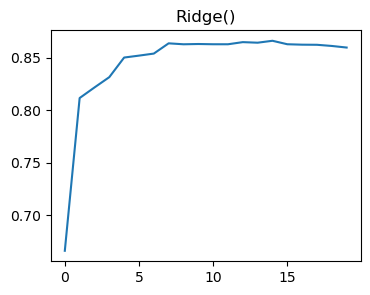

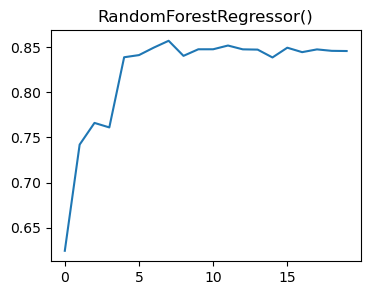

In [17]:
plota_r2_n_features(modelo_ridge)
plota_r2_n_features(modelo_rfr)

In [18]:
# N de features: 7

selector = RFE(modelo_ridge, n_features_to_select = 7, step=1)
selector = selector.fit(X_train_sc, y_train)
mask = selector.support_
features = X_train_sc.columns
sel_features = features[mask]
print(sel_features)

Index(['GNDVI_d01', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08',
       'MCARI1_d08', 'SR_d08'],
      dtype='object')


Ridge(): 0.8537815643146514
RMSE 6.632198845643125
MAE 5.03897671399085
R2 0.9130505998808762


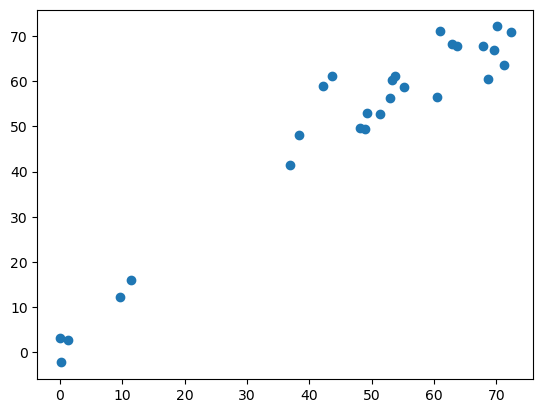

0.9326979105370807


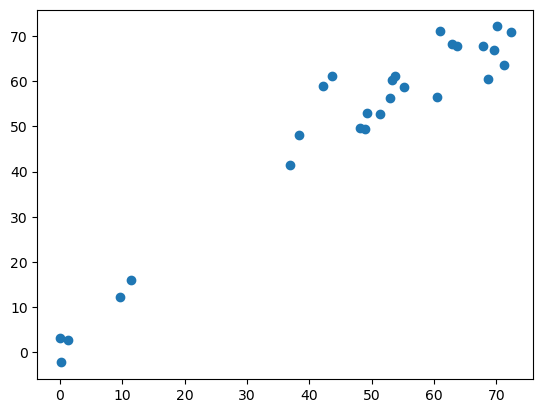

In [19]:
# validação cruzada

modelo = modelo_ridge
X_sel = X_train_sc[sel_features]

score = cross_val_score(modelo, X_sel, y_train, cv = 10, scoring = 'r2')
print(f'{modelo}: {np.mean(score)}')

# modelo final
modelo.fit(X_sel, y_train)
#coef = modelo.coef_
#print(coef)

r2 = modelo.score(X_sel, y_train)

#%% teste final
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = modelo.predict(X_test_sc[sel_features])
r2 = modelo.score(X_test_sc[sel_features], y_test)

rmse = (mean_squared_error(y_test, y_pred))**0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)

plt.scatter(y_test, y_pred)
plt.show()

# R2 da validação
modelo.fit(np.array(y_test).reshape(-1, 1), y_pred)
plt.scatter(y_test, y_pred)

print(modelo.score(np.array(y_test).reshape(-1, 1), y_pred))

In [20]:
# N de features: 7

selector = RFE(modelo_rfr, n_features_to_select = 7, step=1)
selector = selector.fit(X_train_sc, y_train)
mask = selector.support_
features = X_train_sc.columns
sel_features = features[mask]
print(sel_features)

Index(['GNDVI_d28', 'MCARI1_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08',
       'MCARI1_d08', 'SR_d08'],
      dtype='object')


RandomForestRegressor(): 0.8468649835421992
RMSE 7.704994482561056
MAE 6.722874074074074
R2 0.8826464648456082


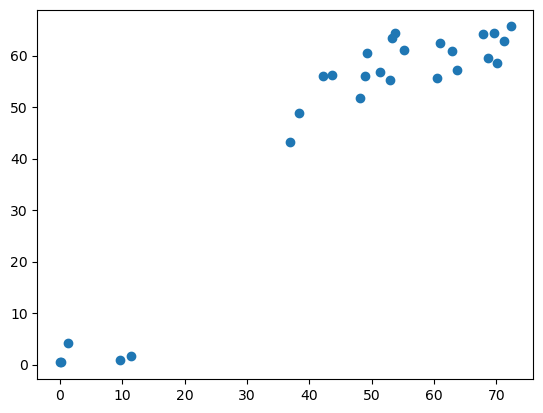

0.9956368518268964


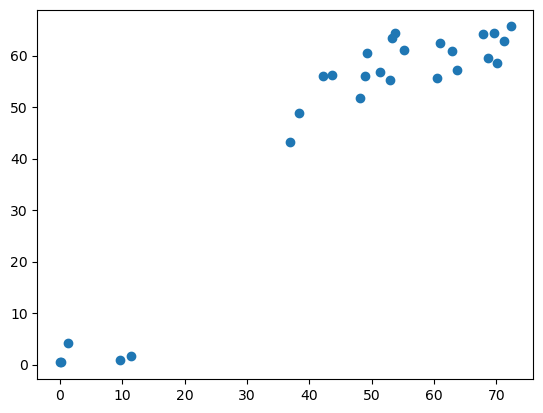

In [21]:
# validação cruzada

modelo = modelo_rfr
X_sel = X_train_sc[sel_features]

score = cross_val_score(modelo, X_sel, y_train, cv = 10, scoring = 'r2')
print(f'{modelo}: {np.mean(score)}')

# modelo final
modelo.fit(X_sel, y_train)
#coef = modelo.coef_
#print(coef)

r2 = modelo.score(X_sel, y_train)


#%% teste final
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = modelo.predict(X_test_sc[sel_features])
r2 = modelo.score(X_test_sc[sel_features], y_test)

rmse = (mean_squared_error(y_test, y_pred))**0.5

mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)

plt.scatter(y_test, y_pred)
plt.show()

# R2 da validação

modelo.fit(np.array(y_test).reshape(-1, 1), y_pred)
plt.scatter(y_test, y_pred)

print(modelo.score(np.array(y_test).reshape(-1, 1), y_pred))

# Conclusão

Para determinar qual é o melhor modelo entre os estudados, consideramos diferentes métricas de desempenho: RMSE (Root Mean Square Error), MAE (Mean Absolute Error) e o R² (coefficient of determination).

Comparando as métricas obtidas, pudemos observar que o modelo "Ridge" tem o menor RMSE (6.632198845643125) e MAE (5.03897671399085) em comparação aos outros modelos, ou seja, menor média de erro e uma maior precisão em relação aos valores reais.

Além disso, o modelo "Ridge" também possui o maior valor de R² (0.9130505998808762), o que significa que ele é capaz de explicar uma maior proporção da variação nos dados de saída em relação aos demais.

Em conclusão, o modelo "Ridge" com as features GNDVI_d01', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08','MCARI1_d08' e 'SR_d08' oferece melhores resultados.